In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Titanic competition

Carico i dataset
---------

In [76]:
train=pd.read_csv("train.csv")

In [77]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [78]:
test=pd.read_csv("test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [123]:
gender_sub=pd.read_csv("gender_submission.csv")
gender_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [124]:
#Unisco le etichette al test set con il join in "PassengerId"
test=pd.merge(test,gender_sub,on="PassengerId" )
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_x,Survived_y,Name_length,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,16,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,1,32,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,25,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,16,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,1,44,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,0,26,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1,1,20,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0,0,28,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1,1,41,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0,0,23,0


Possiamo notare che nel test manca la variabile target.
Molte variabili sono quantitative ma sono in realtà categoriali. Potremmo raggrupparle oppure fare delle modifiche su di esse

Fai un groupby con l'età lasciando i missing come una categoria a se per vedere se sono significativi (vedi Cabin)
Fare le prove con full data e magari train test split
prova kfold
fai countvectorizer sul nome come il lavoro del russo (prendi spunto dai suoi risultati per fare prove su variabili)
individua il titolo
prova a fare dummy con la classe
cerca di fare grid search una variabile alla volta
analizza l'alberome regolati su quello
prova a raggruppare l'età in classi e lascia i missing come una classe in se
Cerca di risalire dal ticket alla numerosità

- id passeggero 
- sopravvissuto variabile binaria target
- classe del biglietto 
- nome passeggero
- genere passeggero
- Sibsp  numero di fratelli/sorelle e coniugi a bordo
- Parch numero di genitori/ figli a bordo
- ticket codice
- Fare (prezzo)
- Cabina numero
- Imbarco porto di imbarco (sono3)

Le vere variabili quantitative sono Age, Fare e poi da stabilire sibsp e parch che dovrebbero essere dummy
l'id e nome le scarto per il modello predittivo
Il ticket se riesco a conteggiare per ogni ticket la numerosità sarebbe da aggiungere ( chiedi a Daniele)
Le variabili categoriche che risultano numeriche sono classe sibsp e parch. Posso aggregarle come numero totale( magari in classi) e poi fare la binaria solo o no
La cabina si può specificare la lettera iniziale per arrivare al fatto che sono sul ponte o meno 
Le variabili object oltre alla target sono imbarco e genere poi da vedere cabina e ticket


In [83]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [84]:
gender_sub.Survived.value_counts()

0    266
1    152
Name: Survived, dtype: int64

Distribuzione dei valori nulli 
------

In [85]:
print(train.isnull().sum())
train.isnull().mean()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [86]:
print(test.isnull().sum())
test.isnull().mean()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived_x       0
Survived_y       0
dtype: int64


PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
Survived_x     0.000000
Survived_y     0.000000
dtype: float64

Valori unici
-----

In [87]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [88]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
Survived_x       2
Survived_y       2
dtype: int64

# Variabile Sex
In questo caso ha una certa rilevanza visto che il genere incide molto (74% per le donne e 19% per gli uomini)

In [89]:

train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [90]:
train.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [91]:
pd.crosstab(train["Sex"],train["Survived"])

Survived,0,1
Sex,,
female,81,233
male,468,109


# Variabile Pclass
Pclass ha senso tenerla quantitativa perchè man mano che aumenta la classe diminuisce la media di Survived si abbassa

In [92]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [93]:
train.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [94]:
pd.crosstab(train["Pclass"],train["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119



# Variabile Sibsp
Potremmo raggruppare in classi perchè aumentano se hanno 1 o 2 sibs ma poi scende

In [95]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [96]:
train.groupby("SibSp")["Survived"].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [97]:
pd.crosstab(train["SibSp"],train["Survived"])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


# Variabile  Parch
Anche qui vanno raggruppati in classi perchè  se sono soli sono al 33% con 1 o 2 intorno al 50% e poi crolla all'aumentarer della numerosità

In [98]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [99]:
pd.crosstab(train["Parch"],train["Survived"])

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [100]:
train.groupby("Parch")["Survived"].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

Potrei provare ad incrociare SibSp e Parch

# Variabile Embarked
Ci sono due valori nulli da assegnare
Possiamo notare che chi si imbaracava da Cherbourg aveva piu probabilità di sopravvivere ma questo può dipendere anche dal fatto che ci sono molti più passeggeri di prima classe che non negli altri 2

In [101]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [102]:
pd.crosstab(train["Embarked"],train["Survived"])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [103]:
pd.crosstab(train["Embarked"],train["Pclass"])

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


In [104]:
85/(85+17+66)

0.5059523809523809

In [105]:
train.groupby("Embarked")["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

# Variabili quantitative

In [106]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sirayanian, Mr. Orsen",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [107]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_x,Survived_y
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418,418.000000,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,NaN,NaN
top,NaN,NaN,"Rasmussen, Mrs. (Lena Jacobsen Solvang)",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,NaN,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,NaN,NaN
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN,0.363636,0.363636
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN,0.481622,0.481622
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,0.000000,0.000000
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000,0.000000
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN,1.000000,1.000000


- Sicuramente l'id del passeggero posso farne a meno. 
Pclass sembra simmetrica ma dobbiamo vedere se va trattata come numerica o come dummy


In [108]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [109]:
test.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived_x,Survived_y
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211,-0.023245,-0.023245
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147,-0.108615,-0.108615
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932,-0.000013,-0.000013
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539,0.099943,0.099943
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046,0.159120,0.159120
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000,0.191514,0.191514
Survived_x,-0.023245,-0.108615,-0.000013,0.099943,0.159120,0.191514,1.000000,1.000000
Survived_y,-0.023245,-0.108615,-0.000013,0.099943,0.159120,0.191514,1.000000,1.000000


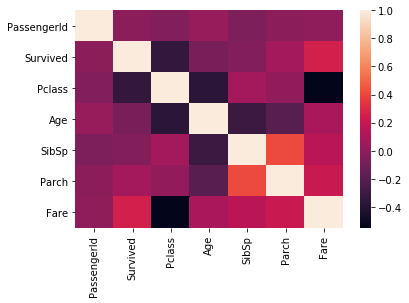

In [110]:
sns.heatmap(train.corr())

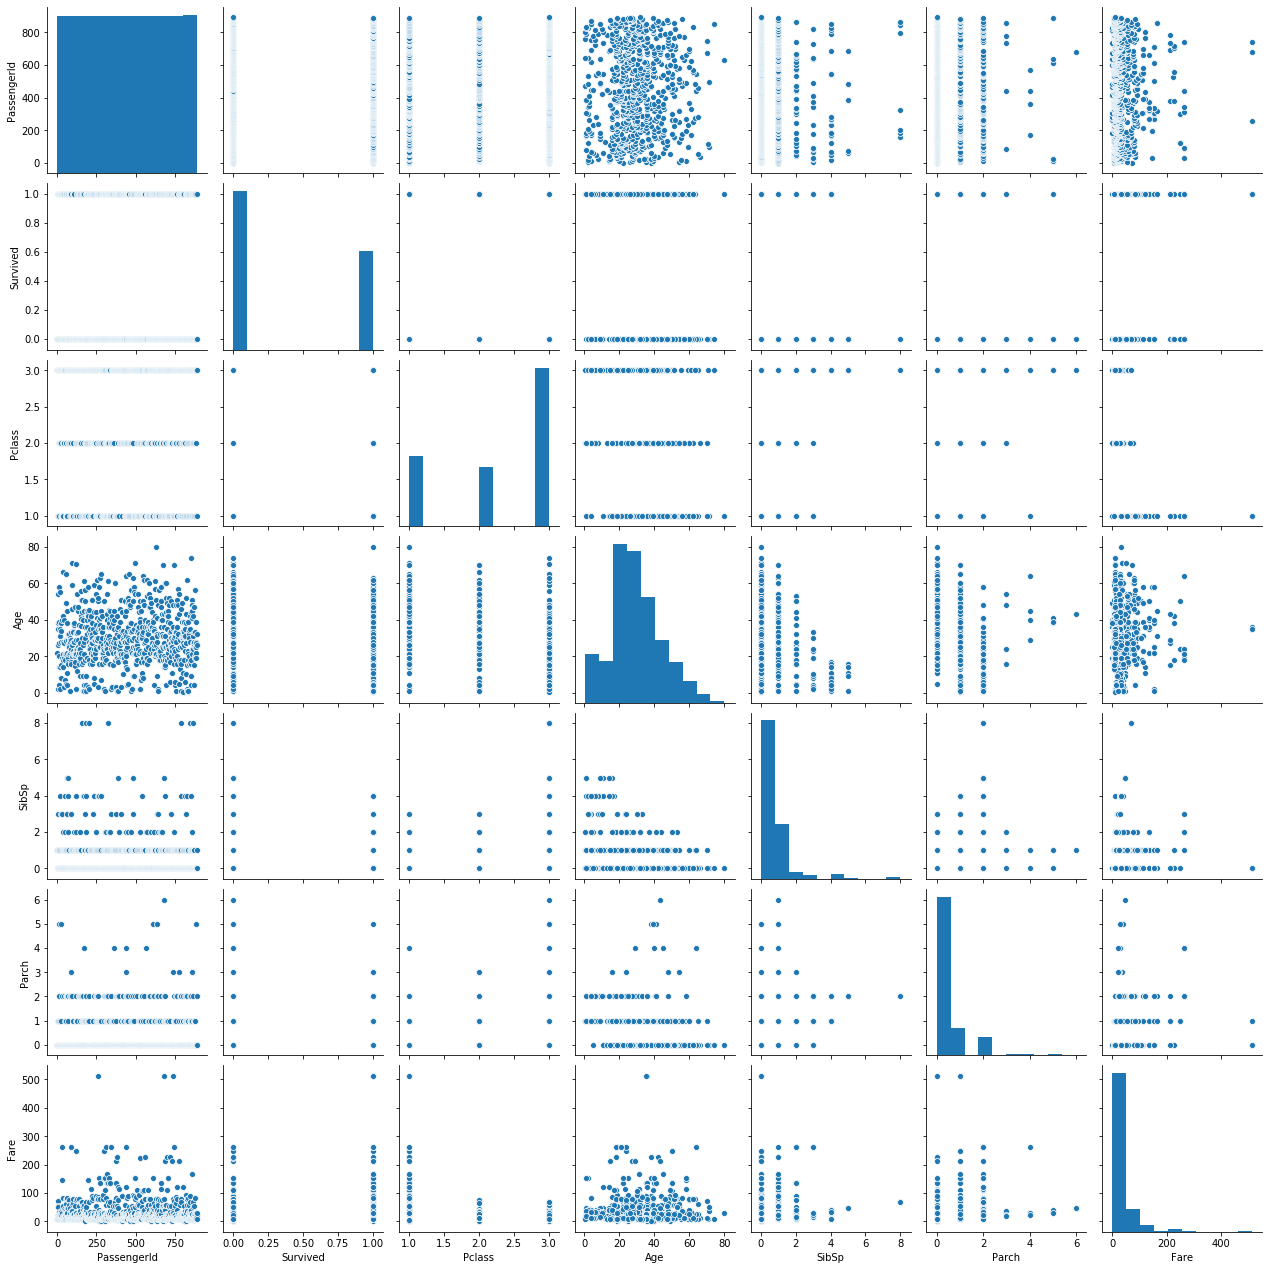

In [111]:
sns.pairplot(train)
plt.show()

# Creiamo altre variabili

In [112]:
train_b=train.copy()
train_b

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Variabile lunghezza nome
Creo una variabile che mi indica la lunghezza del nome... spesso le persone altolocate hanno un nome molto lungo

In [113]:
train['Name_length'] = train['Name'].apply(len)
test['Name_length'] = test['Name'].apply(len)

In [114]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name_length
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.012986
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.332350
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.220001
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.034612
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.165019
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.252282
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.155832
Name_length,-0.012986,0.332350,-0.220001,0.034612,0.165019,0.252282,0.155832,1.000000


In [115]:
train.Name_length.value_counts().head(10)

19    64
25    55
27    50
18    50
26    49
28    43
24    43
17    42
21    40
23    39
Name: Name_length, dtype: int64

In [116]:
train["Name_length"].describe()

count    891.000000
mean      26.965208
std        9.281607
min       12.000000
25%       20.000000
50%       25.000000
75%       30.000000
max       82.000000
Name: Name_length, dtype: float64

# Variabile Over40

Ho deciso di vedere una classe per separare in base alla lunghezza del nome( generalmente donne benestanti o uomini benestanti

In [117]:
train.sort_values("Name_length").head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S,12
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,12
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,13
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,13
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,14
832,833,0,3,"Saad, Mr. Amin",male,NaN,0,0,2671,7.2292,NaN,C,14
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S,14
694,695,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,NaN,S,15
108,109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S,15
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,15


In [119]:
train[train["Ticket"]=="1601"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,13
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,13
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,14
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S,15
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,12
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S,12
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,15


In [120]:
train.groupby("Name_length")["Survived"].mean()

Name_length
12    0.500000
13    0.500000
14    0.333333
15    0.133333
16    0.230769
17    0.214286
18    0.200000
19    0.234375
20    0.282051
21    0.325000
22    0.315789
23    0.282051
24    0.372093
25    0.327273
26    0.224490
27    0.360000
28    0.372093
29    0.500000
30    0.432432
31    0.400000
32    0.565217
33    0.545455
34    0.428571
35    1.000000
36    0.333333
37    0.700000
38    0.444444
39    0.444444
40    0.428571
41    1.000000
42    0.200000
43    0.800000
44    1.000000
45    0.777778
46    0.571429
47    0.727273
48    1.000000
49    1.000000
50    1.000000
51    1.000000
52    0.750000
53    1.000000
54    0.000000
55    0.500000
56    0.666667
57    0.500000
61    1.000000
65    1.000000
67    1.000000
82    1.000000
Name: Survived, dtype: float64

In [125]:
test.groupby("Name_length")["Survived"].mean()

Name_length
13    0.000000
14    0.000000
15    0.125000
16    0.000000
17    0.095238
18    0.240000
19    0.166667
20    0.259259
21    0.277778
22    0.352941
23    0.285714
24    0.269231
25    0.142857
26    0.333333
27    0.300000
28    0.363636
29    0.266667
30    0.357143
31    0.300000
32    0.333333
33    0.250000
34    0.000000
35    0.666667
36    0.600000
37    0.875000
38    0.500000
39    0.800000
40    0.666667
41    0.800000
42    0.666667
43    0.500000
44    0.875000
45    1.000000
46    1.000000
47    1.000000
48    0.800000
49    1.000000
51    1.000000
52    1.000000
53    0.500000
54    1.000000
55    1.000000
58    1.000000
59    1.000000
62    1.000000
63    1.000000
Name: Survived, dtype: float64

In [126]:
def over_40(string):
    if len(string)>40:
        return 1
    else:
        return 0
    
train["Over40"]=train["Name"].apply(over_40)
test["Over40"]=test["Name"].apply(over_40)
print(train["Over40"].value_counts())
print(train.groupby("Over40")["Survived"].mean())
test.groupby("Over40")["Survived"].mean()

0    801
1     90
Name: Over40, dtype: int64
Over40
0    0.337079
1    0.800000
Name: Survived, dtype: float64


Over40
0    0.285714
1    0.888889
Name: Survived, dtype: float64

In [127]:
pd.crosstab(train["Over40"],train["Survived"])

Survived,0,1
Over40,,
0,531,270
1,18,72


In [128]:
pd.pivot_table(train,"Survived",index=["Sex"],
              columns=["Over40"])

Over40,0,1
Sex,,
female,0.714894,0.822785
male,0.180212,0.636364


In [129]:
pd.crosstab(test["Over40"],test["Survived"])

Survived,0,1
Over40,,
0,260,104
1,6,48


In [130]:
pd.crosstab(test["Over40"],test["Sex"])

Sex,female,male
Over40,,
0,104,260
1,48,6


In [131]:
pd.pivot_table(train,"Fare",index=["Sex"],
              columns=["Over40"])

Over40,0,1
Sex,,
female,40.859504,55.249105
male,25.426839,30.517800


In [132]:
pd.pivot_table(test,"Fare",index=["Sex"],
              columns=["Over40"])

Over40,0,1
Sex,,
female,43.515666,63.250435
male,27.464124,30.279867


In [133]:
test.groupby("Sex")["Survived"].mean()

Sex
female    1
male      0
Name: Survived, dtype: int64


Variabie Log Fare
----
La variabile Fare è molto asimmetrica  faccio il logaritmo della variabile Fare 

In [134]:
train["log_Fare"]=np.log1p(train["Fare"])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,Over40,log_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,0,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,1,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,0,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44,1,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24,0,2.202765


In [135]:
test["log_Fare"]=np.log1p(test["Fare"])
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_x,Survived_y,Name_length,Survived,Over40,log_Fare
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,16,0,0,2.178064
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,1,32,1,0,2.079442
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,25,0,0,2.369075
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,16,0,0,2.268252
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,1,44,1,1,2.586824


In [136]:
#Ho ridotto lo skewness di Fare
train.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Name_length    1.392643
Over40         2.652554
log_Fare       0.394928
dtype: float64

In [137]:
test.skew()

PassengerId    0.000000
Pclass        -0.534170
Age            0.457361
SibSp          4.168337
Parch          4.654462
Fare           3.687213
Survived_x     0.568991
Survived_y     0.568991
Name_length    1.233706
Survived       0.568991
Over40         2.219100
log_Fare       0.862168
dtype: float64

Variabile not alone
-----
Creo la variabile not alone che sabbe 0 se un passeggero non è solo e 1 se il passeggero è solo

In [138]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [139]:
test["not_alone"].value_counts()

1    253
0    165
Name: not_alone, dtype: int64

In [140]:
train.Cabin=train.Cabin.fillna("Missing")
train.Cabin

0      Missing
1          C85
2      Missing
3         C123
4      Missing
        ...   
886    Missing
887        B42
888    Missing
889       C148
890    Missing
Name: Cabin, Length: 891, dtype: object

In [141]:
test.Cabin=test.Cabin.fillna("Missing")
test.Cabin

0      Missing
1      Missing
2      Missing
3      Missing
4      Missing
        ...   
413    Missing
414       C105
415    Missing
416    Missing
417    Missing
Name: Cabin, Length: 418, dtype: object

Variabile Deck
-----
creo la variabile deck che  mi indice auqle ponte in base al la cabina

In [142]:
def desk (string):
    prima=string[0]
    return prima

In [143]:
train["deck"]=train["Cabin"].apply(desk)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,Over40,log_Fare,relatives,not_alone,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S,23,0,2.110213,1,0,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,1,4.280593,1,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S,22,0,2.188856,0,1,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44,1,3.990834,1,0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S,24,0,2.202765,0,1,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Missing,S,21,0,2.639057,0,1,M
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,28,0,3.433987,0,1,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,Missing,S,40,0,3.196630,3,0,M
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,21,0,3.433987,0,1,C


In [144]:
test["deck"]=test["Cabin"].apply(desk)
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_x,Survived_y,Name_length,Survived,Over40,log_Fare,relatives,not_alone,deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Missing,Q,0,0,16,0,0,2.178064,0,1,M
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Missing,S,1,1,32,1,0,2.079442,1,0,M
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Missing,Q,0,0,25,0,0,2.369075,0,1,M
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Missing,S,0,0,16,0,0,2.268252,0,1,M
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Missing,S,1,1,44,1,1,2.586824,2,0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,Missing,S,0,0,18,0,0,2.202765,0,1,M
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,1,28,1,0,4.699571,0,1,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,Missing,S,0,0,28,0,0,2.110213,0,1,M
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,Missing,S,0,0,19,0,0,2.202765,0,1,M


In [145]:
pd.crosstab(train["deck"],train["Survived"])

Survived,0,1
deck,,
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2
M,481,206
T,1,0


In [146]:
pd.crosstab(test["deck"],test["Survived"])

Survived,0,1
deck,,
A,4,3
B,9,9
C,16,19
D,8,5
E,5,4
F,5,3
G,0,1
M,219,108


In [147]:
train.groupby("deck")["Survived"].mean()

deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [148]:
test.groupby("deck")["Survived"].mean()

deck
A    0.428571
B    0.500000
C    0.542857
D    0.384615
E    0.444444
F    0.375000
G    1.000000
M    0.330275
Name: Survived, dtype: float64

 Variabile Ponte
 ------
 Creo la variabie ponte che mi dice 0 se non erano sul ponte e 1 se erano sul ponte


In [149]:
def ponte (string):
    if string=="M":
        return 0
    else:
        return 1
    
train["Ponte"]=train.deck.apply(ponte)
train.Ponte

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Ponte, Length: 891, dtype: int64

In [150]:
test["Ponte"]=test.deck.apply(ponte)
test.Ponte

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Name: Ponte, Length: 418, dtype: int64

In [151]:
pd.crosstab(train.Ponte,train.Survived)

Survived,0,1
Ponte,,
0,481,206
1,68,136


In [152]:
pd.crosstab(test.Ponte,test.Survived)

Survived,0,1
Ponte,,
0,219,108
1,47,44


In [153]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  Name_length  891 non-null    int64  
 13  Over40       891 non-null    int64  
 14  log_Fare     891 non-null    float64
 15  relatives    891 non-null    int64  
 16  not_alone    891 non-null    int32  
 17  deck         891 non-null    object 
 18  Ponte        891 non-null    int64  
dtypes: float

In [154]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name_length,Over40,log_Fare,relatives,not_alone,Ponte
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.012986,0.009528,-0.007425,-0.040143,0.057462,0.019919
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.332350,0.286844,0.329862,0.016639,-0.203367,0.316912
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.220001,-0.190670,-0.661022,0.065997,0.135207,-0.725541
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.034612,0.129714,0.116495,-0.301914,0.198270,0.249732
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.165019,0.074107,0.318528,0.890712,-0.584471,-0.040460
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.252282,0.095499,0.332186,0.783111,-0.583398,0.036987
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.155832,0.135133,0.787543,0.217138,-0.271832,0.482075
Name_length,-0.012986,0.332350,-0.220001,0.034612,0.165019,0.252282,0.155832,1.000000,0.764103,0.274365,0.238820,-0.406800,0.190943
Over40,0.009528,0.286844,-0.190670,0.129714,0.074107,0.095499,0.135133,0.764103,1.000000,0.228368,0.098359,-0.298681,0.163050
log_Fare,-0.007425,0.329862,-0.661022,0.116495,0.318528,0.332186,0.787543,0.274365,0.228368,1.000000,0.383658,-0.478410,0.557192


In [155]:
test.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived_x,Survived_y,Name_length,Survived,Over40,log_Fare,relatives,not_alone,Ponte
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211,-0.023245,-0.023245,0.009774,-0.023245,-0.017201,0.022032,0.030087,-0.000629,0.006462
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147,-0.108615,-0.108615,-0.302152,-0.108615,-0.214954,-0.738417,0.012736,0.173555,-0.690579
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932,-0.000013,-0.000013,0.211294,-0.000013,0.256716,0.359480,-0.093632,-0.023871,0.377686
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539,0.099943,0.099943,0.100203,0.099943,0.070413,0.302320,0.788610,-0.618483,0.073067
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046,0.159120,0.159120,0.196714,0.159120,0.115064,0.312222,0.827242,-0.495618,0.037237
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000,0.191514,0.191514,0.219243,0.191514,0.165493,0.842906,0.249924,-0.282491,0.560843
Survived_x,-0.023245,-0.108615,-0.000013,0.099943,0.159120,0.191514,1.000000,1.000000,0.486644,1.000000,0.420560,0.222157,0.161803,-0.244187,0.131464
Survived_y,-0.023245,-0.108615,-0.000013,0.099943,0.159120,0.191514,1.000000,1.000000,0.486644,1.000000,0.420560,0.222157,0.161803,-0.244187,0.131464
Name_length,0.009774,-0.302152,0.211294,0.100203,0.196714,0.219243,0.486644,0.486644,1.000000,0.486644,0.797043,0.304654,0.186245,-0.362811,0.277080
Survived,-0.023245,-0.108615,-0.000013,0.099943,0.159120,0.191514,1.000000,1.000000,0.486644,1.000000,0.420560,0.222157,0.161803,-0.244187,0.131464


In [156]:
data=sns.load_dataset("titanic")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [157]:
data.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [158]:
train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.000000
Embarked       0.002245
Name_length    0.000000
Over40         0.000000
log_Fare       0.000000
relatives      0.000000
not_alone      0.000000
deck           0.000000
Ponte          0.000000
dtype: float64

In [159]:
test.isnull().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.000000
Embarked       0.000000
Survived_x     0.000000
Survived_y     0.000000
Name_length    0.000000
Survived       0.000000
Over40         0.000000
log_Fare       0.002392
relatives      0.000000
not_alone      0.000000
deck           0.000000
Ponte          0.000000
dtype: float64

In [160]:
train["Age"]=train["Age"].fillna(train["Age"].median())
train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.000000
Embarked       0.002245
Name_length    0.000000
Over40         0.000000
log_Fare       0.000000
relatives      0.000000
not_alone      0.000000
deck           0.000000
Ponte          0.000000
dtype: float64

In [161]:
train["Embarked"]=train["Embarked"].fillna("S")
train.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
Name_length    0.0
Over40         0.0
log_Fare       0.0
relatives      0.0
not_alone      0.0
deck           0.0
Ponte          0.0
dtype: float64

In [162]:
test["Age"]=test["Age"].fillna(test["Age"].median())
test.isnull().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.000000
Embarked       0.000000
Survived_x     0.000000
Survived_y     0.000000
Name_length    0.000000
Survived       0.000000
Over40         0.000000
log_Fare       0.002392
relatives      0.000000
not_alone      0.000000
deck           0.000000
Ponte          0.000000
dtype: float64

In [163]:
test["log_Fare"]=test["log_Fare"].fillna(test["log_Fare"].median())
test.isnull().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.000000
Embarked       0.000000
Survived_x     0.000000
Survived_y     0.000000
Name_length    0.000000
Survived       0.000000
Over40         0.000000
log_Fare       0.000000
relatives      0.000000
not_alone      0.000000
deck           0.000000
Ponte          0.000000
dtype: float64

In [164]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Name_length  891 non-null    int64  
 13  Over40       891 non-null    int64  
 14  log_Fare     891 non-null    float64
 15  relatives    891 non-null    int64  
 16  not_alone    891 non-null    int32  
 17  deck         891 non-null    object 
 18  Ponte        891 non-null    int64  
dtypes: float

In [165]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name_length', 'Over40',
       'log_Fare', 'relatives', 'not_alone', 'deck', 'Ponte'],
      dtype='object')

# Results

In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

y = train["Survived"]

features = ["Pclass", "Sex","log_Fare", "Age","Embarked","Ponte",'relatives',"Over40",
       'not_alone',"Name_length"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [215]:
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1).fit(X,y)
y_pred = model.predict(X_test)
y_test=gender_sub["Survived"]
print(accuracy_score(y_test, y_pred))

0.9808612440191388


In [169]:
from sklearn.model_selection import train_test_split, GridSearchCV
rf_params = { "n_estimators": [10],
             "min_samples_split":[3],
             "min_samples_leaf" : [1,8]}

rfm_model = RandomForestClassifier(random_state=1)
rfm_cv_model = GridSearchCV(rfm_model, rf_params, cv=5).fit(X, y)

rf_tuned = RandomForestClassifier(**rfm_cv_model.best_params_).fit(X, y)
y_pred = rf_tuned.predict(X_test)
y_test=gender_sub["Survived"]
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, rf_tuned.predict(X_test)))

0.8636363636363636
0.8636363636363636


In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
#run model
model = RandomForestClassifier(n_estimators = 5, random_state = 0)
grid = GridSearchCV(estimator = model, param_grid = {'max_depth': range(2, 5),
                                                    }, cv = 10,verbose= 3)
grid.fit(X, y)
sorted(grid.cv_results_.keys())
predict = grid.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predict})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV 1/10] END ...................................max_depth=2; total time=   0.0s
[CV 2/10] END ...................................max_depth=2; total time=   0.0s
[CV 3/10] END ...................................max_depth=2; total time=   0.0s
[CV 4/10] END ...................................max_depth=2; total time=   0.0s
[CV 5/10] END ...................................max_depth=2; total time=   0.0s
[CV 6/10] END ...................................max_depth=2; total time=   0.0s
[CV 7/10] END ...................................max_depth=2; total time=   0.0s
[CV 8/10] END ...................................max_depth=2; total time=   0.0s
[CV 9/10] END ...................................max_depth=2; total time=   0.0s
[CV 10/10] END ..................................max_depth=2; total time=   0.0s
[CV 1/10] END ...................................max_depth=3; total time=   0.0s
[CV 2/10] END ..................................

In [171]:

print(accuracy_score(y_test, predict))

0.9569377990430622


def evaluate(model, X_test, y_test):
    predictions = model.predict(y_test)
    errors = abs(predict - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

best_random = grid.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)


In [172]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [173]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X, y)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X, y) * 100, 2)
acc_log

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


80.58

In [174]:
print(accuracy_score(y_test, y_pred))

0.8636363636363636


In [175]:
# Support Vector Machines

svc = SVC()
svc.fit(X, y)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X, y) * 100, 2)
acc_svc

71.38

In [176]:
print(accuracy_score(y_test, y_pred))

0.8636363636363636


In [177]:
#KNN

In [178]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X, y)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X, y) * 100, 2)
acc_knn

86.31

In [179]:
print(accuracy_score(y_test, y_pred))

0.8636363636363636


In [180]:
#Perceptron

In [183]:
perceptron = Perceptron()
perceptron.fit(X, y)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X,y) * 100, 2)
acc_perceptron

39.62

In [184]:
print(accuracy_score(y_test, y_pred))

0.8636363636363636


In [185]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X, y)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X,y) * 100, 2)
acc_linear_svc

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


68.57

In [186]:
#Stocastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X, y)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X, y) * 100, 2)
acc_sgd

79.35

In [187]:
print(accuracy_score(y_test, y_pred))

0.8636363636363636


In [207]:
#Decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X, y) * 100, 2)
acc_decision_tree

100.0

In [189]:
print(accuracy_score(y_test, y_pred))

0.8636363636363636


In [190]:
from sklearn.tree import export_text 
tree_rules= export_text(decision_tree,feature_names= list(X.columns))
print(tree_rules)

|--- Sex_male <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 2.50
|   |   |   |--- relatives <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- relatives >  2.50
|   |   |   |   |--- class: 0
|   |   |--- Age >  2.50
|   |   |   |--- log_Fare <= 3.40
|   |   |   |   |--- log_Fare <= 3.38
|   |   |   |   |   |--- Age <= 56.00
|   |   |   |   |   |   |--- Name_length <= 54.00
|   |   |   |   |   |   |   |--- Name_length <= 36.50
|   |   |   |   |   |   |   |   |--- Age <= 37.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Age >  37.00
|   |   |   |   |   |   |   |   |   |--- Age <= 39.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Age >  39.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Name_length >  36.50
|   |   |   |   |   |   |   |   |--- log_Fare <= 2.67
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |---

In [191]:
#Random forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, y)
Y_pred = random_forest.predict(X_test)
random_forest.score(X, y)
acc_random_forest = round(random_forest.score(X,y) * 100, 2)
acc_random_forest

99.66

In [192]:
print(accuracy_score(y_test, y_pred))

0.8636363636363636


In [193]:
import pydotplus

NameError: name 'tree' is not defined

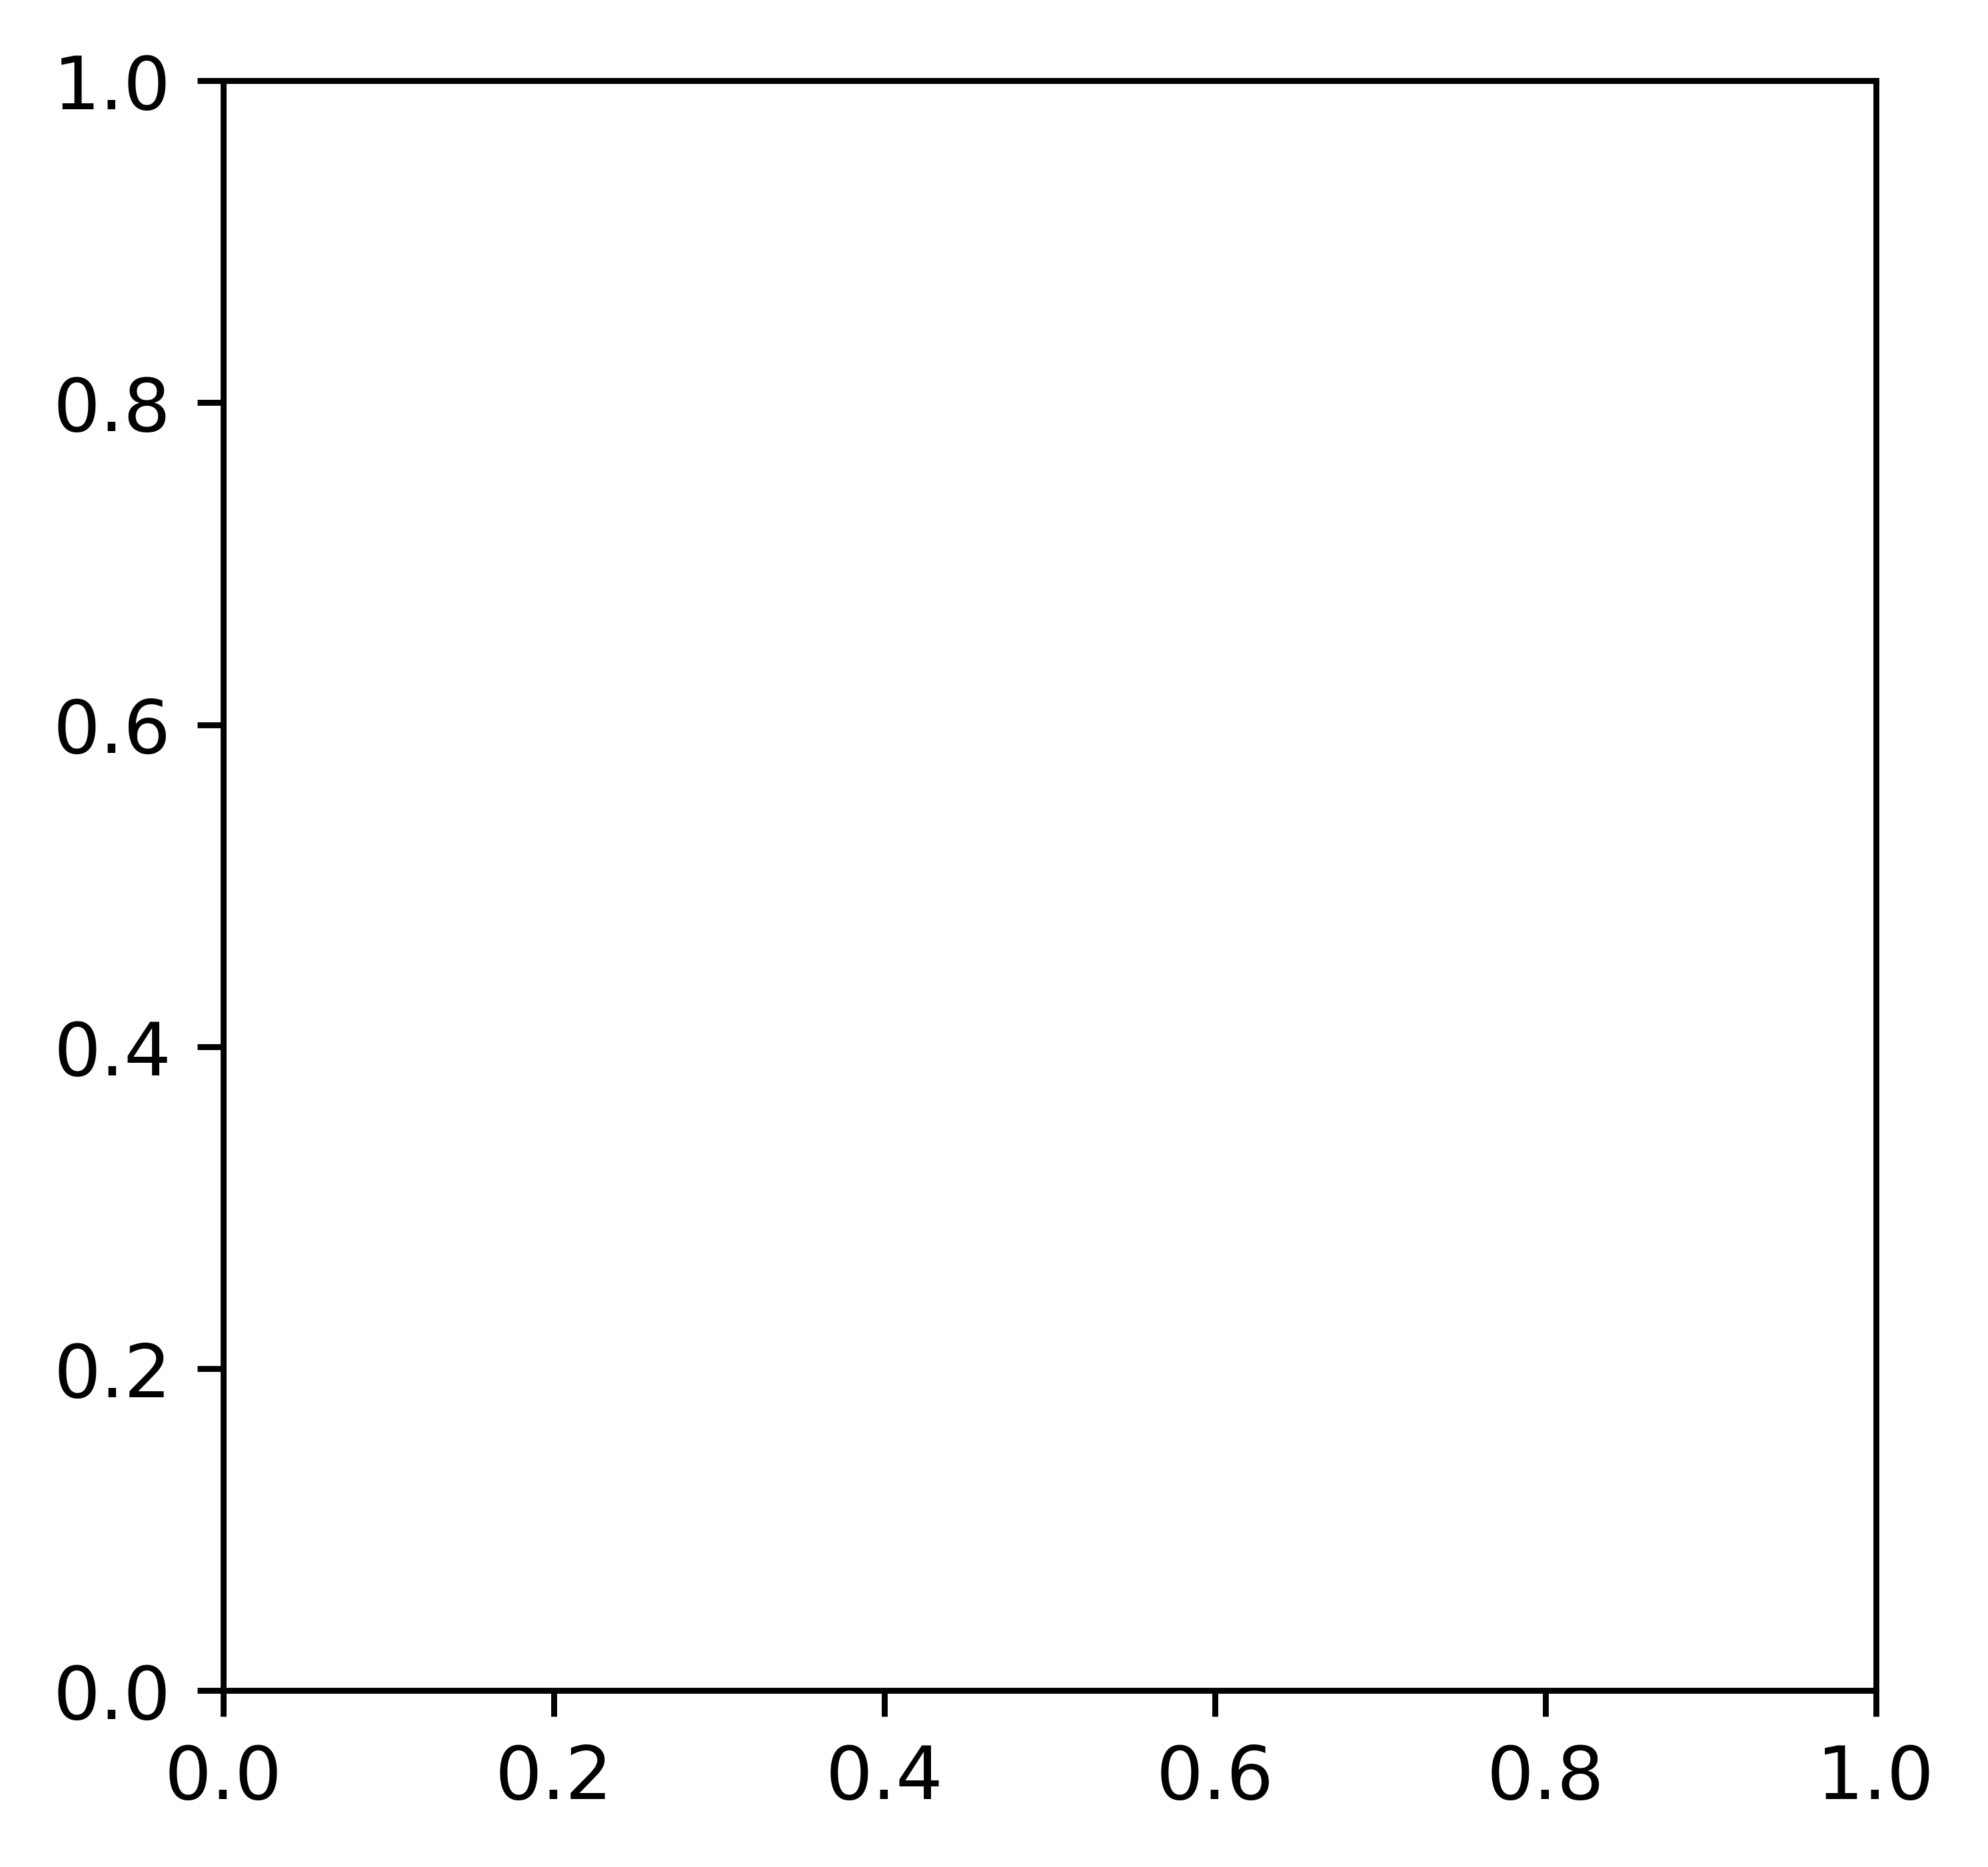

In [197]:
fn=X.columns
cn="Survived"
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(random_forest.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

In [ ]:
#Altri random forest

In [198]:
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
acc_random_forest = round(model.score(X,y) * 100, 2)
acc_random_forest

81.48

In [199]:
print(accuracy_score(y_test, y_pred))

0.8636363636363636


In [200]:
model = RandomForestClassifier(n_estimators = 5, random_state = 0)
grid = GridSearchCV(estimator = model, param_grid = {'max_depth': range(2, 5),
                                                    }, cv = 10)
grid.fit(X, y)
sorted(grid.cv_results_.keys())
predict = grid.predict(X_test)

In [201]:
acc_random_forest = round(grid.score(X,y) * 100, 2)
acc_random_forest

81.93

In [202]:
print(accuracy_score(y_test, y_pred))

0.8636363636363636


In [203]:
rf_params = { "n_estimators": [10],
             "min_samples_split":[3],
             "min_samples_leaf" : [1,8]}

rfm_model = RandomForestClassifier(random_state=1)
rfm_cv_model = GridSearchCV(rfm_model, rf_params, cv=5).fit(X, y)

rf_tuned = RandomForestClassifier(**rfm_cv_model.best_params_).fit(X, y)
y_pred = rf_tuned.predict(X_test)
acc_random_forest = round(rf_tuned.score(X,y) * 100, 2)
acc_random_forest

95.96

In [204]:
print(accuracy_score(y_test, y_pred))

0.8492822966507177


In [205]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the Breast Cancer Dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Arrange Data into Features Matrix and Target Vector
X = df.loc[:, df.columns != 'target']
y = df.loc[:, 'target'].values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)

# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

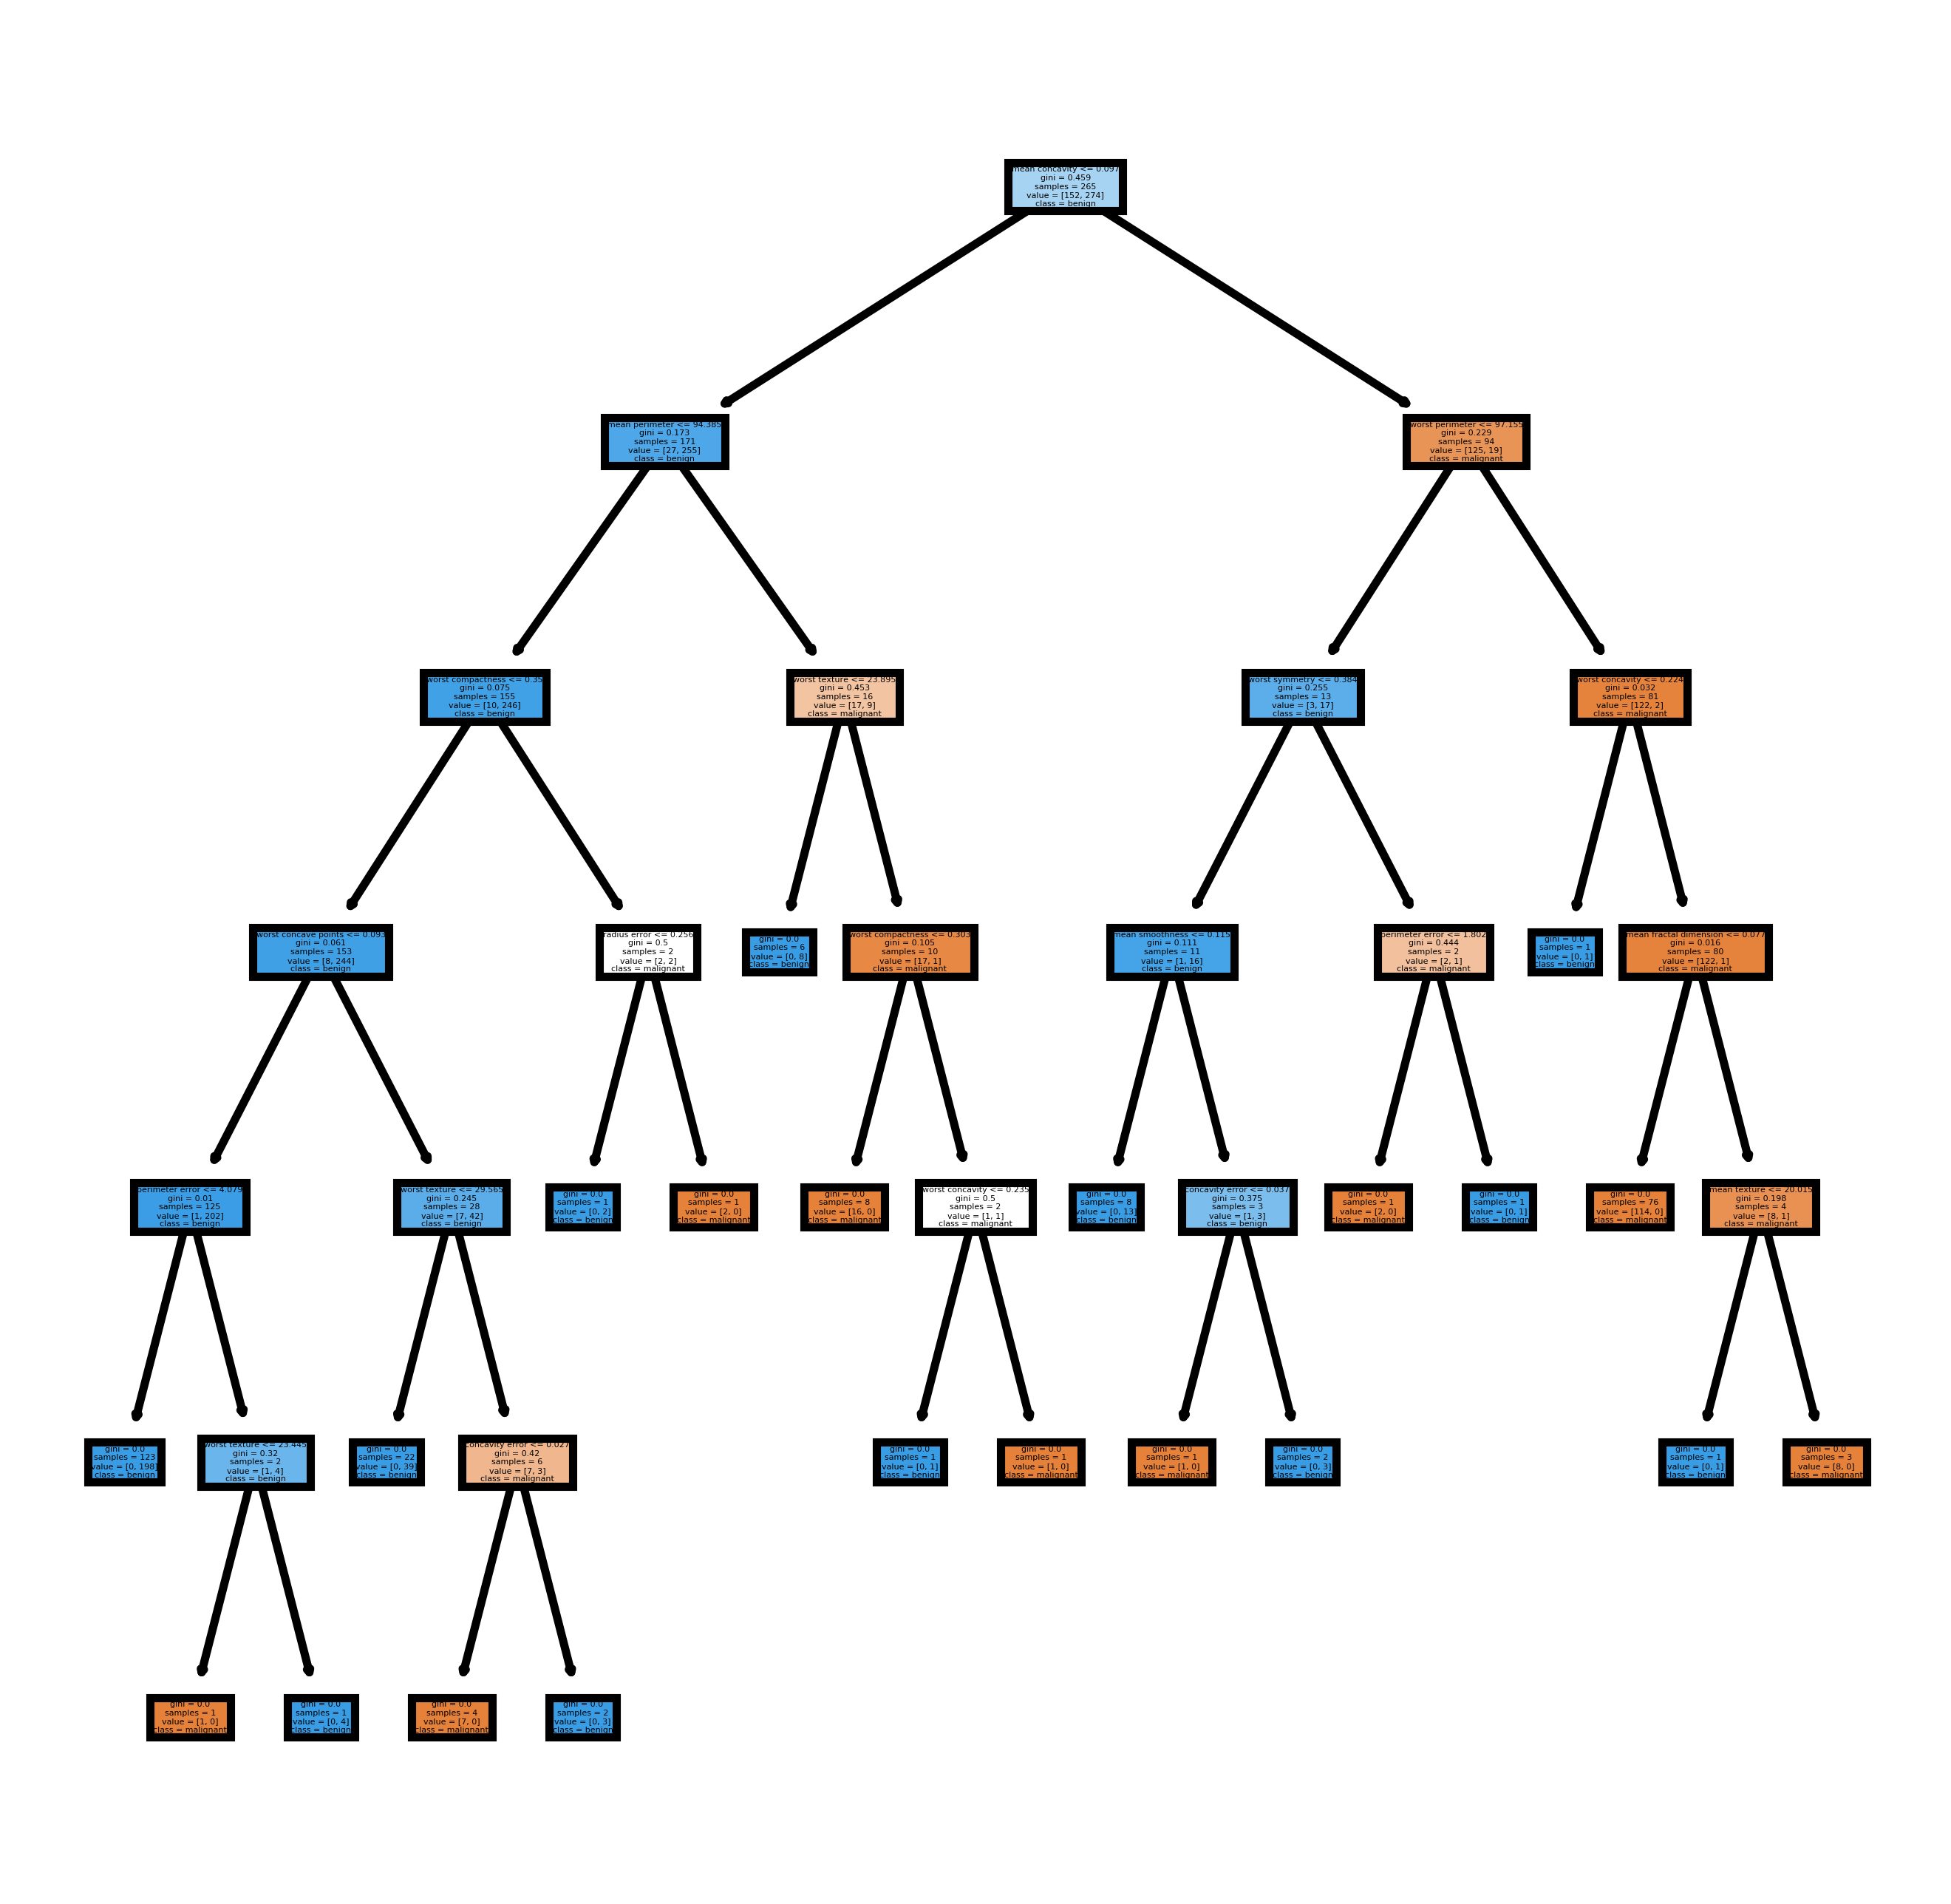

In [206]:
fn=data.feature_names
cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

In [211]:
#Random forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, y)
Y_pred = random_forest.predict(X_test)
random_forest.score(X, y)
acc_random_forest = round(random_forest.score(X,y) * 100, 2)
acc_random_forest


99.66

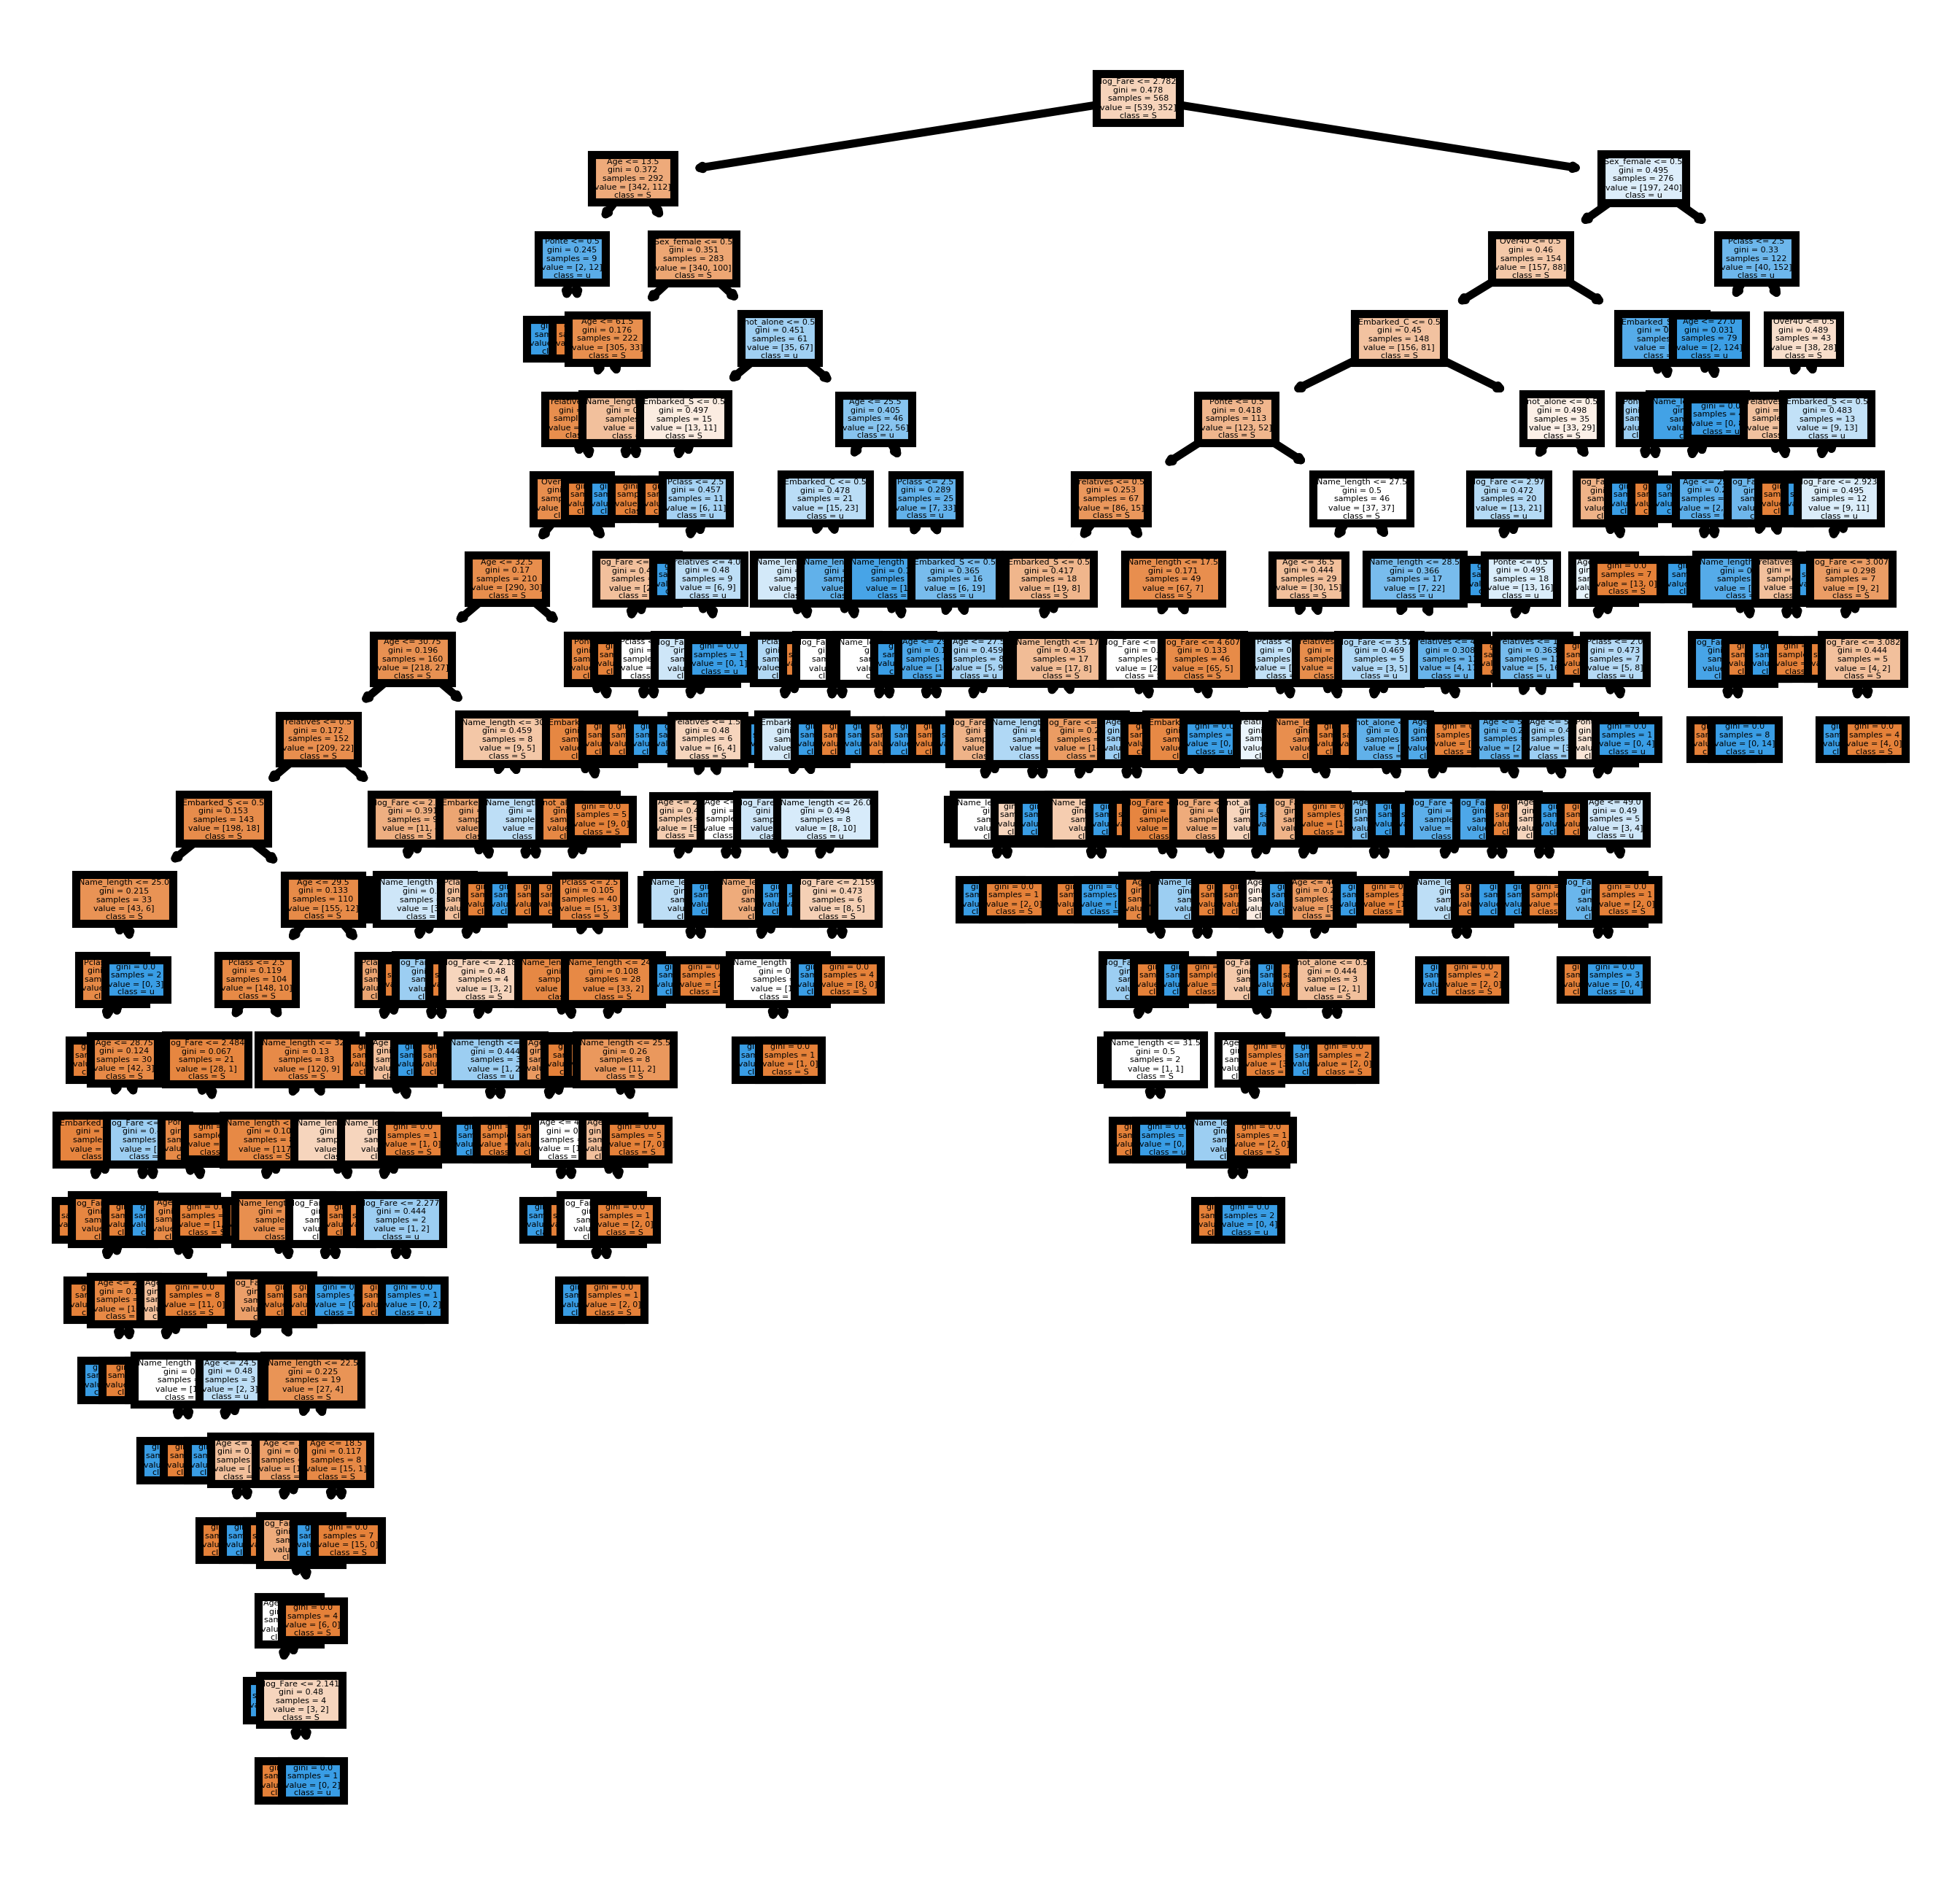

In [214]:
fn=X.columns
cn="Survived"
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(random_forest.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')